In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os



In [9]:
# Verificar o diretório atual
directory = os.getcwd()
print("Diretório atual:", directory)

# Listar todos os arquivos no diretório atual
all_files = os.listdir(directory)
print("Todos os arquivos no diretório:", all_files)

# Filtrar os arquivos que terminam em .txt e que contêm "CDF" no nome
files = [f for f in all_files if f.endswith('.txt') and 'CDF' in f]
print("Arquivos .txt encontrados com 'CDF' no nome:", files)

Diretório atual: c:\Users\danie\OneDrive\Documentos\GitHub\SHARC\sharc\output
Todos os arquivos no diretório: ['IMT_CDF_of_BS_antenna_gain_towards_the_UE.txt', 'IMT_CDF_of_coupling_loss.txt', 'IMT_CDF_of_DL_SINR.txt', 'IMT_CDF_of_DL_SNR.txt', 'IMT_CDF_of_DL_throughput.txt', 'IMT_CDF_of_DL_transmit_power.txt', 'IMT_CDF_of_IMT_station_antenna_gain_towards_system.txt', 'IMT_CDF_of_path_loss.txt', 'IMT_CDF_of_UE_antenna_gain_towards_the_BS.txt', 'logfile.log', 'plot_data.ipynb', 'plot_ras_csv.ipynb', 'RAS', 'ras_csv.ipynb', 'SYS_CDF_of_IMT_to_system_path_loss.txt', 'SYS_CDF_of_system_antenna_gain_towards_IMT_stations.txt', 'SYS_CDF_of_system_INR.txt', 'SYS_CDF_of_system_interference_power_from_IMT_DL.txt', 'SYS_CDF_of_system_PFD.txt', 'SYS_INR_samples.txt', '__init__.py']
Arquivos .txt encontrados com 'CDF' no nome: ['IMT_CDF_of_BS_antenna_gain_towards_the_UE.txt', 'IMT_CDF_of_coupling_loss.txt', 'IMT_CDF_of_DL_SINR.txt', 'IMT_CDF_of_DL_SNR.txt', 'IMT_CDF_of_DL_throughput.txt', 'IMT_CDF_of

In [10]:
 # Função para ler e plotar a CDF de um arquivo
def plot_cdf(file_path, ax,step=5):
        try:
            # Ler o arquivo e pular linhas de cabeçalho ou comentários
            data = pd.read_csv(file_path, sep='\s+', header=None, comment='#', usecols=[0, 1])
            data.columns = ['Value', 'CDF']
            
            # Plotar a CDF
            ax.plot(data['Value'], data['CDF'])
            ax.set_title(os.path.basename(file_path))
            ax.set_xlabel('SNR')
            ax.set_ylabel('CDF')
            ax.grid(True)
            
            # Definir ticks dos eixos como números inteiros
            ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
            ax.yaxis.set_major_locator(plt.FixedLocator([0, 0.25, 0.5, 0.75, 1]))
            
            # Ajustar os valores do eixo x para serem inteiros do menor ao maior valor
            min_value = int(data['Value'].min())
            max_value = int(data['Value'].max())
            ax.set_xticks(range(min_value, max_value + 1,step))
        except Exception as e:
            print(f"Erro ao ler o arquivo {file_path}: {e}")

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\danie\AppData\Local\Temp\ipykernel_23780\3269884827.py:5: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv(file_path, sep='\s+', header=None, comment='#', usecols=[0, 1])


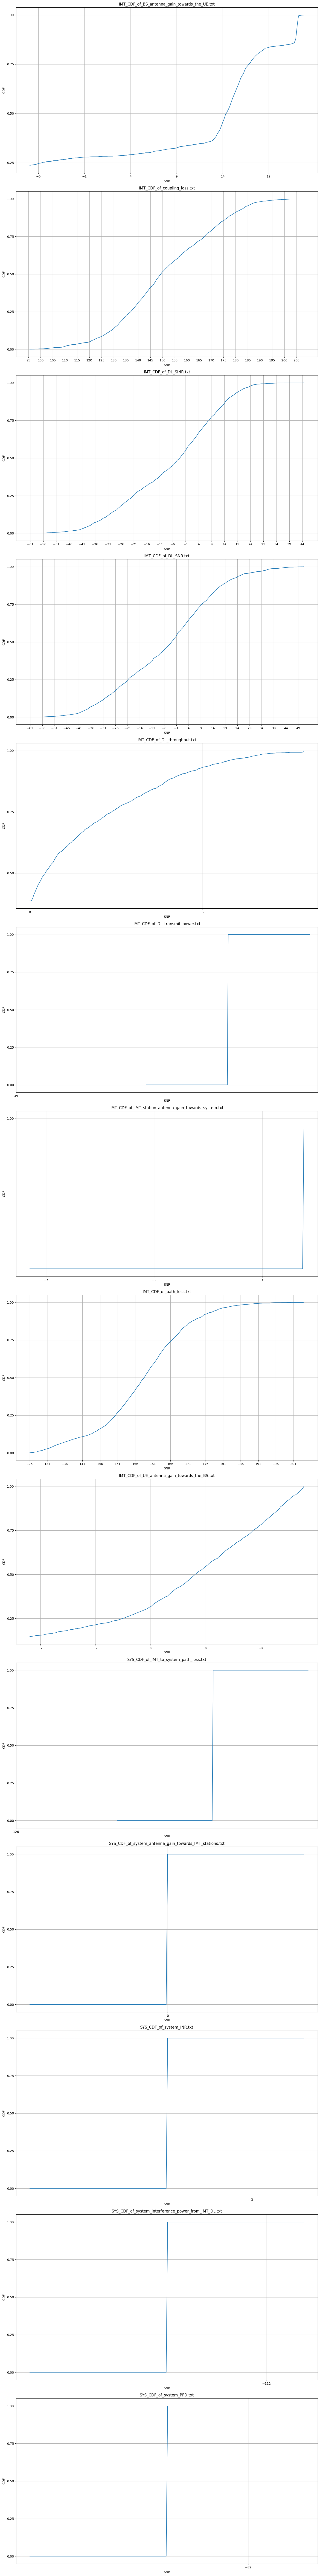

In [11]:
 # Criar uma figura com subplots
fig, axes = plt.subplots(nrows=len(files), ncols=1, figsize=(14, 8 * len(files)))

# Se houver apenas um arquivo, `axes` não será uma lista
if len(files) == 1:
    axes = [axes]

# Plotar cada arquivo em um eixo separado
for ax, file in zip(axes, files):
    plot_cdf(os.path.join(directory, file), ax)

plt.tight_layout()
plt.show()

In [5]:

# Verificar o diretório atual
directory = os.getcwd()
print("Diretório atual:", directory)

# Listar todos os arquivos no diretório atual
all_files = os.listdir(directory)
print("Todos os arquivos no diretório:", all_files)

# Filtrar os arquivos que terminam em .txt e que contêm "CDF" no nome
files = [f for f in all_files if f.endswith('.txt') and 'samples' in f]
print("Arquivos .txt encontrados com 'samples' no nome:", files)


Diretório atual: c:\Users\danie\OneDrive\Documentos\GitHub\SHARC\sharc\output
Todos os arquivos no diretório: ['IMT_CDF_of_BS_antenna_gain_towards_the_UE.txt', 'IMT_CDF_of_coupling_loss.txt', 'IMT_CDF_of_DL_SINR.txt', 'IMT_CDF_of_DL_SNR.txt', 'IMT_CDF_of_DL_throughput.txt', 'IMT_CDF_of_DL_transmit_power.txt', 'IMT_CDF_of_IMT_station_antenna_gain_towards_system.txt', 'IMT_CDF_of_path_loss.txt', 'IMT_CDF_of_UE_antenna_gain_towards_the_BS.txt', 'logfile.log', 'plot_data.ipynb', 'plot_ras_csv.ipynb', 'RAS', 'ras_csv.ipynb', 'SYS_CDF_of_IMT_to_system_path_loss.txt', 'SYS_CDF_of_system_antenna_gain_towards_IMT_stations.txt', 'SYS_CDF_of_system_INR.txt', 'SYS_CDF_of_system_interference_power_from_IMT_DL.txt', 'SYS_CDF_of_system_PFD.txt', 'SYS_INR_samples.txt', '__init__.py']
Arquivos .txt encontrados com 'samples' no nome: ['SYS_INR_samples.txt']


In [6]:
# Função para ler e plotar a INR de um arquivo
def plot_inr(file_path, ax,steps=100):
        try:
            # Ler o arquivo e pular linhas de cabeçalho ou comentários
            data = pd.read_csv(file_path, sep='\s+', header=None, comment='#', usecols=[0, 1])
            data.columns = ['Value', 'INR']
            
            # Plotar a INR
            ax.plot(data['Value'], data['INR'])
            ax.set_title(os.path.basename(file_path))
            ax.set_xlabel('Value')
            ax.set_ylabel('INR')
            ax.grid(True)
            
            # Definir ticks dos eixos como números inteiros
            ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
            # Ajustar os valores do eixo x para serem inteiros do menor ao maior valor
            min_value = int(data['Value'].min())
            max_value = int(data['Value'].max())
            ax.set_xticks(range(min_value, max_value + 1, steps))
        except Exception as e:
            print(f"Erro ao ler o arquivo {file_path}: {e}")


<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\danie\AppData\Local\Temp\ipykernel_23780\1230688768.py:5: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv(file_path, sep='\s+', header=None, comment='#', usecols=[0, 1])


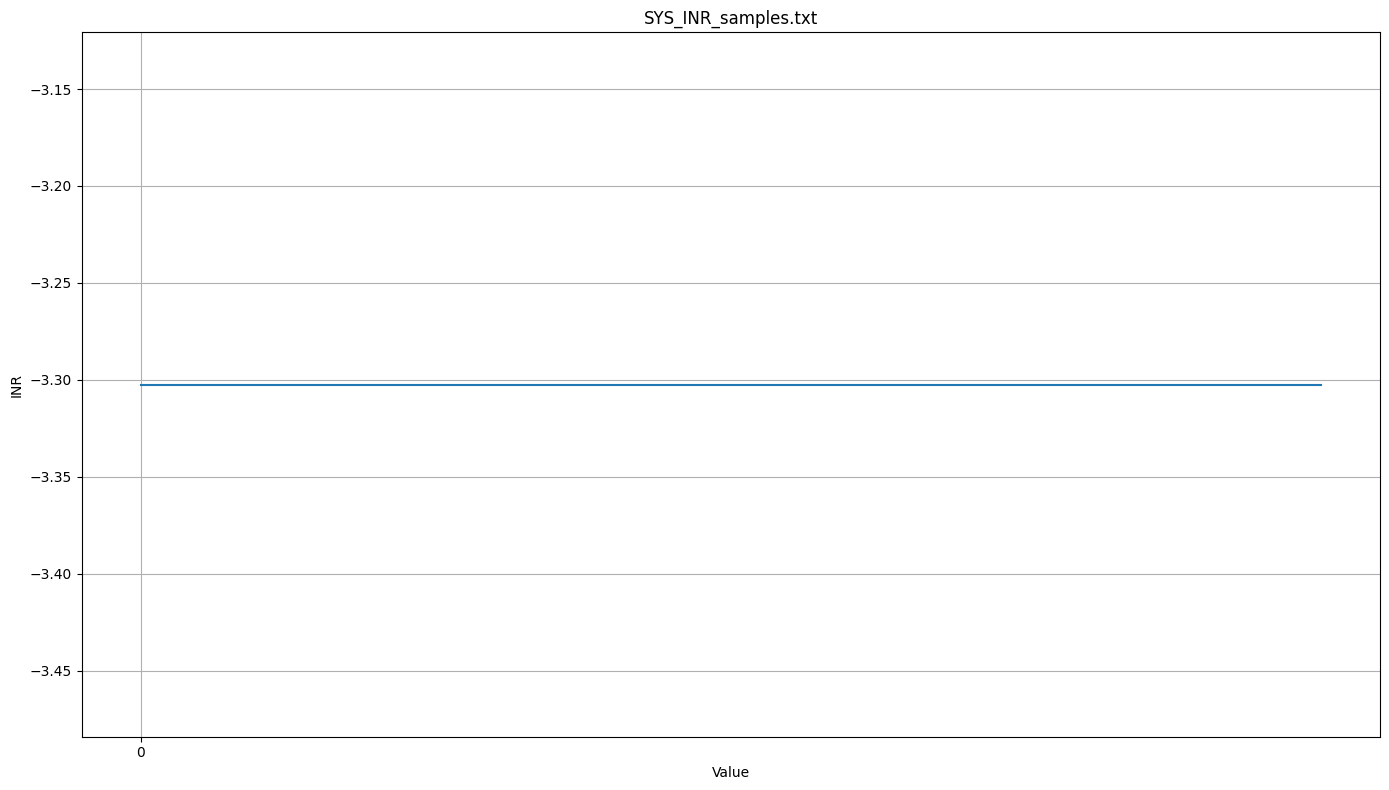

In [7]:
# Criar uma figura com subplots
fig, axes = plt.subplots(nrows=len(files), ncols=1, figsize=(14, 8 * len(files)))

# Se houver apenas um arquivo, `axes` não será uma lista
if len(files) == 1:
    axes = [axes]

# Plotar cada arquivo em um eixo separado
for ax, file in zip(axes, files):
    plot_inr(os.path.join(directory, file), ax)

plt.tight_layout()
plt.show()